In [1]:
import pandas as pd

# --- load ---
# update these paths
train_path = "/kaggle/input/home-credit-default-risk/application_train.csv"


In [2]:
train = pd.read_csv(train_path)


In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.size

37516342

In [5]:
print("Total columns:", train.shape[1])
print("\nColumn names:\n")
for col in train.columns:
    print(col)

Total columns: 122

Column names:

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPA

In [6]:
train['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [7]:
print("The target analysis shows that only about 8% of loans defaulted, while the remaining 92% were repaid normally. This means high-risk cases are relatively rare, and most applicants are ultimately safe. Therefore, the business challenge is to identify this small high-risk group at application time without generating excessive false alerts for the majority of low-risk applicants.\nBecause only ~8% of loans default, the business goal is to detect this small high-risk group while avoiding unnecessary alerts on the remaining ~92% of safe applicants.")

The target analysis shows that only about 8% of loans defaulted, while the remaining 92% were repaid normally. This means high-risk cases are relatively rare, and most applicants are ultimately safe. Therefore, the business challenge is to identify this small high-risk group at application time without generating excessive false alerts for the majority of low-risk applicants.
Because only ~8% of loans default, the business goal is to detect this small high-risk group while avoiding unnecessary alerts on the remaining ~92% of safe applicants.


In [8]:
missing_pct = train.isna().sum().sort_values(ascending=False)
missing_pct.head(20)

COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
FLOORSMIN_MODE              208642
FLOORSMIN_AVG               208642
FLOORSMIN_MEDI              208642
YEARS_BUILD_AVG             204488
YEARS_BUILD_MODE            204488
YEARS_BUILD_MEDI            204488
OWN_CAR_AGE                 202929
LANDAREA_MEDI               182590
LANDAREA_AVG                182590
LANDAREA_MODE               182590
dtype: int64

In [9]:
missing_pct.tail(50)

FLAG_OWN_CAR                   0
SK_ID_CURR                     0
AMT_CREDIT                     0
AMT_INCOME_TOTAL               0
CNT_CHILDREN                   0
NAME_INCOME_TYPE               0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
NAME_EDUCATION_TYPE            0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
CODE_GENDER                    0
TARGET                         0
FLAG_OWN_REALTY                0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
FLAG_PHONE                     0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
REG_REGION_NOT_WORK_REGION     0
FLAG_DOCUM

In [10]:
flag_document_cols = [col for col in train.columns if col.startswith('FLAG_DOCUMENT_')]

df_clean = train.drop(columns=flag_document_cols)

In [11]:
flag_document_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [12]:
df_clean.isna().sum().sort_values(ascending=True).head(50)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
NAME_HOUSING_TYPE                  0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
REGION_POPULATION_RELATIVE         0
REGION_RATING_CLIENT_W_CITY        0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
REGION_RATING_CLIENT               0
FLAG_EMAIL                         0
REG_CITY_NOT_LIVE_CITY             0
L

In [13]:
baseline_cols = [
    'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
    'DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN','CNT_FAM_MEMBERS',
    'NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY',
    'REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_2','TARGET'
]

df_clean= df_clean[baseline_cols]


In [14]:
df_clean.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,TARGET
0,202500.0,406597.5,24700.5,351000.0,-9461,-637,0,1.0,Secondary / secondary special,Working,Single / not married,House / apartment,N,Y,0.018801,2,2,0.262949,1
1,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,0,2.0,Higher education,State servant,Married,House / apartment,N,N,0.003541,1,1,0.622246,0
2,67500.0,135000.0,6750.0,135000.0,-19046,-225,0,1.0,Secondary / secondary special,Working,Single / not married,House / apartment,Y,Y,0.010032,2,2,0.555912,0
3,135000.0,312682.5,29686.5,297000.0,-19005,-3039,0,2.0,Secondary / secondary special,Working,Civil marriage,House / apartment,N,Y,0.008019,2,2,0.650442,0
4,121500.0,513000.0,21865.5,513000.0,-19932,-3038,0,1.0,Secondary / secondary special,Working,Single / not married,House / apartment,N,Y,0.028663,2,2,0.322738,0


In [15]:
print("Default rates vary only modestly across income bands, with the highest income group showing lower risk. This indicates that income alone is not a strong discriminator of default risk and should be evaluated alongside repayment burden and other stability indicators.")

Default rates vary only modestly across income bands, with the highest income group showing lower risk. This indicates that income alone is not a strong discriminator of default risk and should be evaluated alongside repayment burden and other stability indicators.


In [16]:
df_clean['AGE_YEARS'] = (-df_clean['DAYS_BIRTH'] / 365).round(1)
df_clean['EMPLOYMENT_YEARS'] = (-df_clean['DAYS_EMPLOYED'] / 365).round(1)

In [17]:
import pandas as pd

def band_summary(feature, df, q=4):
    """
    Quantile-band a numeric feature and return:
    band, n, defaults, default_rate
    """
    tmp = df[[feature, "TARGET"]].dropna()

    bands = pd.qcut(tmp[feature], q=q, duplicates="drop")

    summary = (
        tmp.assign(band=bands)
           .groupby("band", observed=True)["TARGET"]
           .agg(n="count", defaults="sum", default_rate="mean")
           .reset_index()
    )
    return summary

features = [
    "AMT_INCOME_TOTAL",
    "AMT_ANNUITY",
    "AGE_YEARS",
    "EMPLOYMENT_YEARS",
    "EXT_SOURCE_2",
    "REGION_POPULATION_RELATIVE",
    "CNT_CHILDREN",
    "CNT_FAM_MEMBERS",
    "AMT_CREDIT",
    "AMT_GOODS_PRICE"
]

for f in features:
    print(f"\n=== {f} (4 bands) ===")
    display(band_summary(f, df_clean, q=4))



=== AMT_INCOME_TOTAL (4 bands) ===


,band,n,defaults,default_rate
0,"(25649.999, 112500.0]",100578,8443,0.083945
1,"(112500.0, 147150.0]",53182,4537,0.085311
2,"(147150.0, 202500.0]",82213,6902,0.083953
3,"(202500.0, 117000000.0]",71538,4943,0.069096



=== AMT_ANNUITY (4 bands) ===


,band,n,defaults,default_rate
0,"(1615.499, 16524.0]",76893,5430,0.070618
1,"(16524.0, 24903.0]",76880,6730,0.087539
2,"(24903.0, 34596.0]",76962,7105,0.092318
3,"(34596.0, 258025.5]",76764,5560,0.072430



=== AGE_YEARS (4 bands) ===


,band,n,defaults,default_rate
0,"(20.499, 34.0]",77176,8481,0.109892
1,"(34.0, 43.2]",77409,6687,0.086385
2,"(43.2, 53.9]",76237,5584,0.073245
3,"(53.9, 69.1]",76689,4073,0.053111



=== EMPLOYMENT_YEARS (4 bands) ===


,band,n,defaults,default_rate
0,"(-1000.701, 0.8]",78697,5568,0.070752
1,"(0.8, 3.3]",75705,8286,0.109451
2,"(3.3, 7.6]",77488,6651,0.085833
3,"(7.6, 49.1]",75621,4320,0.057127



=== EXT_SOURCE_2 (4 bands) ===


,band,n,defaults,default_rate
0,"(-0.0009999183, 0.392]",76716,10966,0.142943
1,"(0.392, 0.566]",76710,6271,0.081749
2,"(0.566, 0.664]",76713,4618,0.060198
3,"(0.664, 0.855]",76712,2918,0.038038



=== REGION_POPULATION_RELATIVE (4 bands) ===


,band,n,defaults,default_rate
0,"(-0.00071, 0.01]",78124,6733,0.086184
1,"(0.01, 0.0188]",79033,6866,0.086875
2,"(0.0188, 0.0287]",81972,6905,0.084236
3,"(0.0287, 0.0725]",68382,4321,0.063189



=== CNT_CHILDREN (4 bands) ===


,band,n,defaults,default_rate
0,"(-0.001, 1.0]",276490,22063,0.079797
1,"(1.0, 19.0]",31021,2762,0.089036



=== CNT_FAM_MEMBERS (4 bands) ===


,band,n,defaults,default_rate
0,"(0.999, 2.0]",226204,17684,0.078177
1,"(2.0, 3.0]",52601,4608,0.087603
2,"(3.0, 20.0]",28704,2533,0.088246



=== AMT_CREDIT (4 bands) ===


,band,n,defaults,default_rate
0,"(44999.999, 270000.0]",78421,5680,0.072430
1,"(270000.0, 513531.0]",75428,7304,0.096834
2,"(513531.0, 808650.0]",77786,7126,0.091610
3,"(808650.0, 4050000.0]",75876,4715,0.062141



=== AMT_GOODS_PRICE (4 bands) ===


,band,n,defaults,default_rate
0,"(40499.999, 238500.0]",79877,6368,0.079723
1,"(238500.0, 450000.0]",78102,8535,0.109280
2,"(450000.0, 679500.0]",73720,5512,0.074769
3,"(679500.0, 4050000.0]",75534,4389,0.058106


*EXT_SOURCE_2 shows strong and monotonic risk separation, with default rates declining from ~14% in the lowest band to ~4% in the highest band. This indicates that external credit scores are a primary driver of default risk and are highly effective for ranking applicants while avoiding unnecessary alerts on low-risk customers.*

In [18]:
cat_cols = [
    'NAME_EDUCATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY'
]

for col in cat_cols:
    print(f"\n--- {col} ---")
    display(
        df_clean
        .groupby(col, observed=True)['TARGET']
        .agg(
            n='count',
            defaults='sum',
            default_rate='mean'
        )
        .sort_values('default_rate', ascending=False)
    )



--- NAME_EDUCATION_TYPE ---


,n,defaults,default_rate
NAME_EDUCATION_TYPE,,,
Lower secondary,3816,417,0.109277
Secondary / secondary special,218391,19524,0.089399
Incomplete higher,10277,872,0.084850
Higher education,74863,4009,0.053551
Academic degree,164,3,0.018293



--- NAME_INCOME_TYPE ---


,n,defaults,default_rate
NAME_INCOME_TYPE,,,
Maternity leave,5,2,0.400000
Unemployed,22,8,0.363636
Working,158774,15224,0.095885
Commercial associate,71617,5360,0.074843
State servant,21703,1249,0.057550
Pensioner,55362,2982,0.053864
Businessman,10,0,0.000000
Student,18,0,0.000000



--- NAME_FAMILY_STATUS ---


,n,defaults,default_rate
NAME_FAMILY_STATUS,,,
Civil marriage,29775,2961,0.099446
Single / not married,45444,4457,0.098077
Separated,19770,1620,0.081942
Married,196432,14850,0.075599
Widow,16088,937,0.058242
Unknown,2,0,0.000000



--- NAME_HOUSING_TYPE ---


,n,defaults,default_rate
NAME_HOUSING_TYPE,,,
Rented apartment,4881,601,0.123131
With parents,14840,1736,0.116981
Municipal apartment,11183,955,0.085397
Co-op apartment,1122,89,0.079323
House / apartment,272868,21272,0.077957
Office apartment,2617,172,0.065724



--- FLAG_OWN_CAR ---


,n,defaults,default_rate
FLAG_OWN_CAR,,,
N,202924,17249,0.085002
Y,104587,7576,0.072437



--- FLAG_OWN_REALTY ---


,n,defaults,default_rate
FLAG_OWN_REALTY,,,
N,94199,7842,0.083249
Y,213312,16983,0.079616


In [19]:
df_clean.groupby('REGION_RATING_CLIENT')['TARGET'] \
    .agg(n='count', default_rate='mean') \
    .sort_index()


,n,default_rate
REGION_RATING_CLIENT,,
1,32197,0.048203
2,226984,0.078891
3,48330,0.111028


**AGE_YEARS**

Younger applicants show higher default risk, while default rates consistently decrease as age increases.
Age acts as a stability proxy, with older applicants generally exhibiting more predictable financial behavior.

**EMPLOYMENT_YEARS**

Applicants with shorter employment histories have significantly higher default rates than those with long tenure.
Employment duration is a strong indicator of income stability and repayment reliability.

**EXT_SOURCE_2**

Applicants with low external credit scores default at substantially higher rates than those with high scores.
This feature provides the strongest single separation between high-risk and low-risk applicants.

**AMT_ANNUITY**

Default risk increases as monthly repayment burden rises, particularly in mid-range annuity levels.
Repayment pressure impacts risk, although high annuities can be manageable for higher-capacity borrowers.

**AMT_INCOME_TOTAL**

Default rates remain relatively flat across most income bands, improving meaningfully only at very high income levels.
Income alone is insufficient to reliably distinguish risky from safe applicants.

**AMT_CREDIT**

Larger loan amounts do not consistently correspond to higher default risk across bands.
Loan size represents exposure rather than inherent borrower risk.

**AMT_GOODS_PRICE**

Goods price shows weak standalone separation of default risk across bands.
Asset value provides transaction context rather than a primary risk signal.

**CNT_CHILDREN**

Default risk increases slightly as the number of dependents rises.
The impact is modest and primarily reflects affordability constraints.

**CNT_FAM_MEMBERS**

Larger household sizes show a mild association with higher default risk in some segments.
Household size acts as a supporting affordability indicator rather than a key driver.

**NAME_EDUCATION_TYPE**

Applicants with lower education levels exhibit higher default rates than those with higher education.
Education reflects long-term earning potential and financial stability.

**NAME_INCOME_TYPE**

Unstable income types show higher default risk, while fixed and predictable income sources show lower risk.
Income stability is more influential than income amount in explaining default behavior.

**NAME_FAMILY_STATUS**

Single and civil-marriage applicants have higher default rates than married or widowed applicants.
Household stability appears to reduce financial risk.

**NAME_HOUSING_TYPE**

Applicants in rented or temporary housing show higher default rates than homeowners.
Housing stability provides meaningful contextual insight into borrower risk.

**FLAG_OWN_CAR / FLAG_OWN_REALTY**

Applicants who own assets default at slightly lower rates than those who do not.
Asset ownership provides a small but consistent financial buffer signal.

**REGION_RATING_CLIENT / REGION_RATING_CLIENT_W_CITY**

Higher regional risk ratings are associated with materially higher default rates.
Regional economic conditions influence borrower repayment outcomes.

In [20]:
exclude_cols = [
    'DAYS_BIRTH',      # replaced by AGE_YEARS
    'DAYS_EMPLOYED'    # replaced by EMPLOYMENT_YEARS
]


In [21]:
df_clean = df_clean.drop(columns=exclude_cols)


In [22]:
df_clean.isna().sum()

AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
CNT_CHILDREN                     0
CNT_FAM_MEMBERS                  2
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
REGION_POPULATION_RELATIVE       0
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
EXT_SOURCE_2                   660
TARGET                           0
AGE_YEARS                        0
EMPLOYMENT_YEARS                 0
dtype: int64

In [23]:
df_clean.columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'REGION_POPULATION_RELATIVE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'TARGET', 'AGE_YEARS', 'EMPLOYMENT_YEARS'],
      dtype='object')

In [24]:
import matplotlib.pyplot as plt

def plot_distribution(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Histogram
    axes[0].hist(df[col].dropna(), bins=50)
    axes[0].set_title(f'{col} - Histogram')

    # Boxplot
    axes[1].boxplot(df[col].dropna(), vert=False)
    axes[1].set_title(f'{col} - Boxplot')

    plt.tight_layout()
    plt.show()


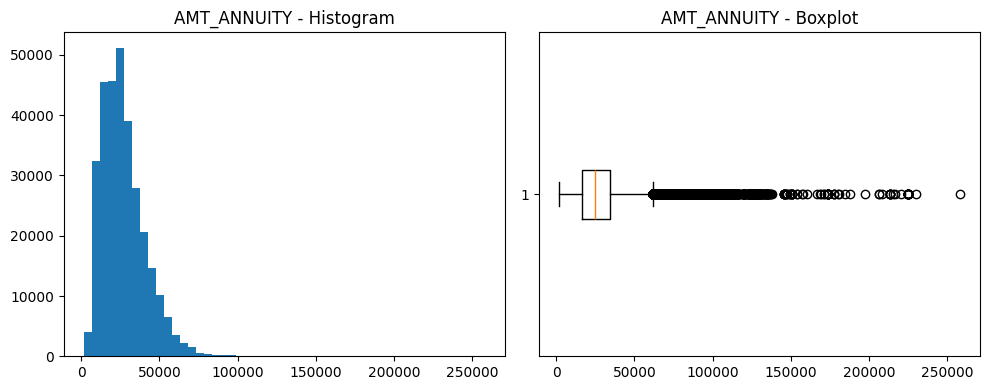

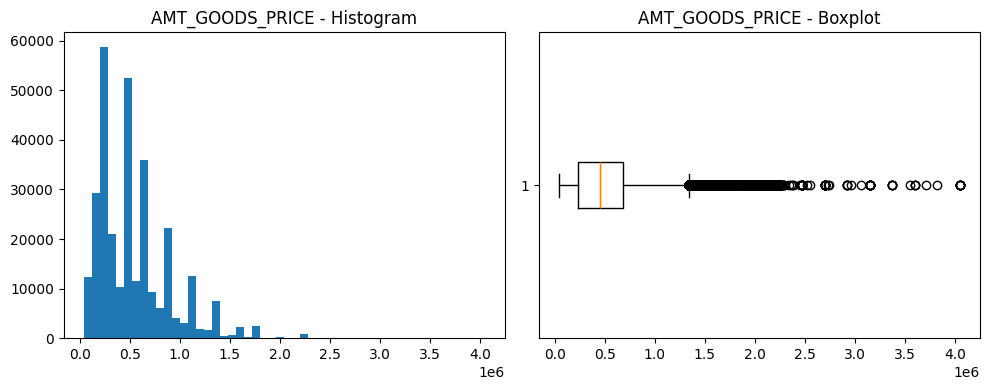

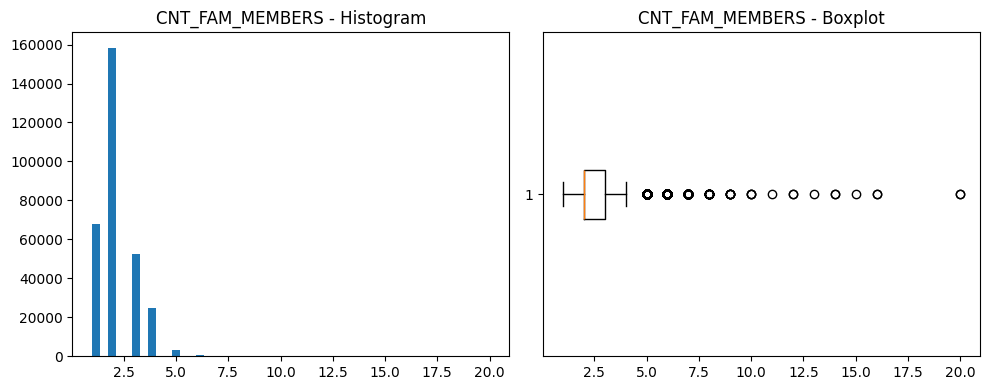

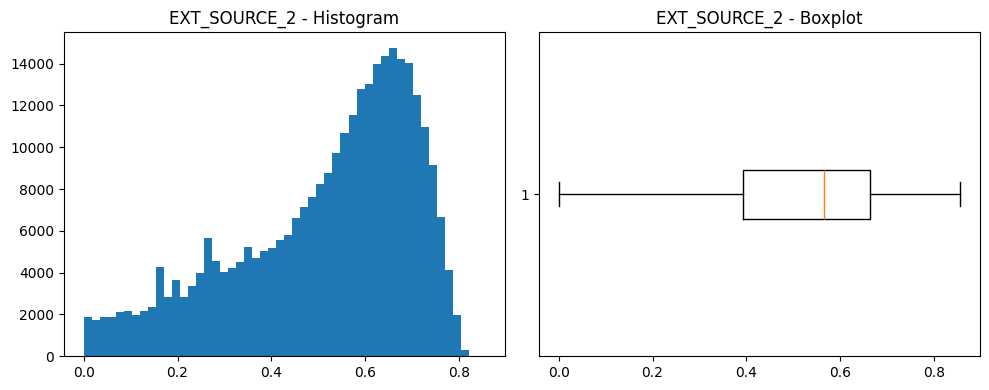

In [25]:
for col in ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2']:
    plot_distribution(df_clean, col)


In [26]:
exclude_cols = [
    'TARGET',          # label      
]
X = df_clean.drop(columns=[c for c in exclude_cols if c in df_clean.columns])
y = df_clean['TARGET']


*Distributional analysis using histograms and boxplots shows that key numeric features are skewed and, in several cases, contain extreme values. Median imputation was therefore selected to provide robust, representative values. Although EXT_SOURCE_2 does not exhibit extreme outliers, its skewed and bounded distribution makes median imputation preferable to avoid distortion of applicant risk positioning.*

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# --- 1) Feature lists (edit only if your column names differ) ---
numeric_features = [
    'EXT_SOURCE_2',
    'EMPLOYMENT_YEARS',
    'AGE_YEARS',
    'AMT_ANNUITY',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'REGION_POPULATION_RELATIVE',
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY'
]

ordinal_feature = ['NAME_EDUCATION_TYPE']  # ordinal
onehot_features = [
    'NAME_INCOME_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY'
]

# --- 2) Explicit ordinal ordering for education ---
education_order = [[
    'Lower secondary',
    'Secondary / secondary special',
    'Incomplete higher',
    'Higher education',
    'Academic degree'
]]

In [28]:
# --- 3) Pipelines per feature type ---
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

edu_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=education_order))
])

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [29]:
# --- 4) Full preprocessor ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),
        ('edu', edu_pipe, ordinal_feature),
        ('cat', cat_pipe, onehot_features),
    ],
    remainder='drop'  # drop anything not listed
)

# (Optional sanity check) Ensure all expected columns are in X
expected_cols = set(numeric_features + ordinal_feature + onehot_features)
missing_in_X = expected_cols - set(X.columns)
if missing_in_X:
    raise ValueError(f"These expected columns are missing from X: {missing_in_X}")

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['EXT_SOURCE_2', 'EMPLOYMENT_YEARS',
                                  'AGE_YEARS', 'AMT_ANNUITY',
                                  'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_GOODS_PRICE', 'CNT_CHILDREN',
                                  'CNT_FAM_MEMBERS',
                                  'REGION_POPULATION_RELATIVE',
                                  'REGION_RATING_CLIENT',
                                  'REGION_RATING_CLIENT_W_CITY']),
                                ('edu',
                                 Pipeline(step...
                                                                              'Secondary '
                                                                              '/ '
                                                                              'secondary '
                                                                              'special',
                                                                              'Incomplete '
                                                                              'higher',
                                                                              'Higher '
                                                                              'education',
                                                                              'Academic '
                                                                              'degree']]))]),
                                 ['NAME_EDUCATION_TYPE']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
                                  'NAME_HOUSING_TYPE', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY'])])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model1 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',   # critical for imbalanced data
        n_jobs=-1
    ))
])
model2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(
        solver='saga',
        max_iter=5000,
        class_weight='balanced',
        n_jobs=-1
    ))
])
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['EXT_SOURCE_2',
                                                   'EMPLOYMENT_YEARS',
                                                   'AGE_YEARS', 'AMT_ANNUITY',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'AMT_GOODS_PRICE',
                                                   'CNT_CHILDREN',
                                                   'CNT_FAM_MEMBERS',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'REGION_RATING_CLIENT',
                                                   'REGION_RATING_CLIENT_...
                                                                                               'degree']]))]),
                                                  ['NAME_EDUCATION_TYPE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['NAME_INCOME_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY'])])),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=5000,
                                    n_jobs=-1, solver='saga'))])

In [32]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)



In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred1)

cm_df1= pd.DataFrame(
    cm1,
    index=['Actual: Non-Default (0)', 'Actual: Default (1)'],
    columns=['Predicted: Non-Default (0)', 'Predicted: Default (1)']
)

cm_df1


,Predicted: Non-Default (0),Predicted: Default (1)
Actual: Non-Default (0),35180,21358
Actual: Default (1),1872,3093


In [34]:
cm2 = confusion_matrix(y_test, y_pred2)

cm_df2 = pd.DataFrame(
    cm2,
    index=['Actual: Non-Default (0)', 'Actual: Default (1)'],
    columns=['Predicted: Non-Default (0)', 'Predicted: Default (1)']
)

cm_df2

,Predicted: Non-Default (0),Predicted: Default (1)
Actual: Non-Default (0),28099,28439
Actual: Default (1),1947,3018
